## 1. Import the necessary libraries

In [1]:
from gensim.models import Word2Vec,KeyedVectors
import numpy as np
from tqdm import tqdm
import pandas as pd
from keras.utils import to_categorical
import numpy as np
from tensorflow.keras.utils import plot_model
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.manifold import TSNE
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import load_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import import_ipynb
from EDASentimentAnalysis import remove_punctuation,remove_stopword

importing Jupyter notebook from EDASentimentAnalysis.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7786 entries, 0 to 7785
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   index      7786 non-null   int64 
 1   comment    7786 non-null   object
 2   n_star     7786 non-null   int64 
 3   date_time  7786 non-null   object
 4   label      7786 non-null   object
dtypes: int64(2), object(3)
memory usage: 304.3+ KB
['Điện thoại khá tốt pin trâu khá mượt bắt wifi cực tốt chỉ là thỉnh thoảng máy bị đơ phải thoát ra vào lại và máy ko cập nhật lên miul 12'
 'Lúc trước nghe bảo điện thoại chơi game nóng, nhưng mua về chiến liên quân 3 4h liên tục thì chỉ thấy ấm không nóng như lời đồn, những thứ khác thì vũng chẳng có gì để nói vì quá ngon rồi'
 '1. Máy nếu không chơi game, lướt web..., ít sử dụng thì giữ Pin cao nhất được khoảng 1 ngày 16 tiếng ( Tính luôn cả lúc ngủ nhé vì khi ngủ thì chẳng động gì tới ) . Không được 2

## 2 Data preprocessing

> Read File CSV

In [2]:
def ReadData(path):
    df=pd.read_csv(path,encoding='utf-8')
    return df['comment'], df['label']

> Execute function

In [3]:
X_train,y_train = ReadData("../Data/trainprocessed.csv")
X_test,y_test=ReadData("../Data/testprocesssed.csv")

In [4]:
print(f"X_Train size:{X_train.shape}")
print(f"y_train size {y_train.shape}")

X_Train size:(7786,)
y_train size (7786,)


> word separation

In [5]:
def wordseparation(comment):
    return [review.split() for review in comment]

In [6]:
X_train=wordseparation(X_train)
X_test=wordseparation(X_test)
print(f"X_Train: {X_train[0:2]}")
print(f"X_test: {X_test[0:2]}")

X_Train: [['pin', 'kém', 'còn', 'miễn', 'chê', 'mua', '832019', 'tình_trạng', 'pin', 'còn', '88', 'ai', 'giống', 'tôi'], ['sao', 'gọi', 'điện_thoại', 'màn_hình', 'chấm', 'nhỏ', 'nháy', 'gần', 'camera', 'vậylúc']]
X_test: [['điện', 'thoải', 'ổn', 'facelock', 'cực', 'nhanh', 'vân', 'tay', 'ôk', 'màn_hình', 'lớn', 'pin', 'trâu', 'liên_quân', 'zalo', 'youtube', 'một', 'ngày', 'mất', 'khoảng', '45', 'tuy', 'chip', '439', 'mượt', 'đa_nhiệm', 'khá', 'ổn'], ['mình', 'mới', 'mua', 'vivo91c', 'tải', 'ứng_dụng', 'games', 'nhanh', 'hài_lòng', 'cài', 'hình', 'nền', 'khóa', 'màn_hình', 'hay', 'mình', 'biết', 'hết', 'chức_năng', 'nó', 'tư_vấn', 'viên', 'nhiệt_tình']]


> word embedding

In [7]:
model_wordembedding = Word2Vec(sentences=X_train, vector_size=128, window=5, min_count=0, workers=4, sg=1)
model_wordembedding.wv.save("../model/word.model")

> Load Model_Word2Vec

In [8]:
model_embedding = KeyedVectors.load('../model/word.model')
num_words = len(model_embedding.index_to_key)
print("Number of Words:", num_words)
print("Vector:", model_embedding.get_vector('phần_mềm'))

Number of Words: 11616
Vector: [-0.34510052 -0.5309441   0.11333752  0.21768714  0.09074544 -0.2597414
 -0.37815377 -0.05560665 -0.02810814  0.24311577  0.47776198  0.19847083
 -0.13972904 -0.05337832  0.01811154  0.38999212 -0.29533178  0.03119879
 -0.0892988   0.12099742  0.02086498  0.31673402 -0.16022429 -0.5724134
  0.02808717  0.1996537  -0.43567482  0.3880195  -0.08352788 -0.21556811
 -0.02358851  0.01330821  0.09913508  0.28226796 -0.05738477 -0.14700565
  0.43756363 -0.10036079  0.12692955  0.01812893 -0.18199705  0.19082479
  0.01554144 -0.23933606  0.1450474   0.3466477  -0.17350836 -0.36679247
 -0.07346012  0.2674262   0.1060531   0.08343203  0.22260273  0.03337986
 -0.0515368  -0.03446173  0.42023805 -0.18629868 -0.05200778  0.18574019
  0.0971356   0.02040319  0.26250216 -0.11283372  0.24925211 -0.03018338
  0.28465042 -0.09373843 -0.18784066 -0.33646923 -0.04361423 -0.38649493
 -0.279935   -0.09205232  0.01528657 -0.36894712  0.1091043   0.27051556
 -0.47656974  0.110622

> Get a list of vector representations of words

In [9]:
# Lấy danh sách các vectơ từ
vectors = [model_embedding.get_vector(word) for word in model_embedding.index_to_key]
vectors_array = np.array(vectors)
# Giảm chiều dữ liệu từ 128 chiều xuống còn 2 chiều bằng t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors_array)
print(vectors_2d[0:2])

[[86.44374    2.1081767]
 [92.1497    12.940096 ]]


> Visualize the context and semantic correlation of words

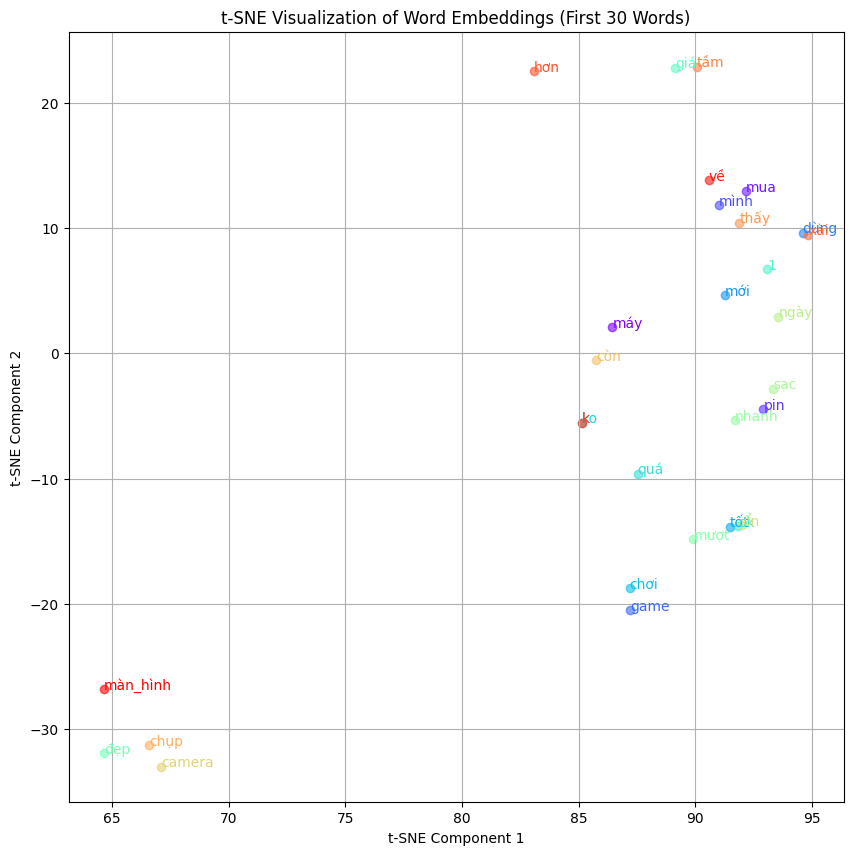

In [10]:
# Trực quan hóa các vectơ từ
plt.figure(figsize=(10, 10))
num_words = 30
# Màu cho mỗi từ
colors = plt.cm.rainbow(np.linspace(0, 1, num_words))

# Vẽ các điểm dữ liệu (từ) với màu khác nhau
for i, word in enumerate(model_embedding.index_to_key[:num_words]):  
    plt.scatter(vectors_2d[i, 0], vectors_2d[i, 1], marker='o', color=colors[i], alpha=0.6)
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]), fontsize=10, color=colors[i])

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Word Embeddings (First 30 Words)')
plt.grid(True)
plt.show()


> Corpus

In [11]:
model_embedding.key_to_index

{'máy': 0,
 'mua': 1,
 'pin': 2,
 'mình': 3,
 'game': 4,
 'dùng': 5,
 'mới': 6,
 'tốt': 7,
 'chơi': 8,
 'ko': 9,
 'quá': 10,
 'ok': 11,
 '1': 12,
 'giá': 13,
 'đẹp': 14,
 'mượt': 15,
 'nhanh': 16,
 'sạc': 17,
 'ngày': 18,
 'ổn': 19,
 'camera': 20,
 'còn': 21,
 'chụp': 22,
 'thấy': 23,
 'tầm': 24,
 'xài': 25,
 'hơn': 26,
 'k': 27,
 'về': 28,
 'màn_hình': 29,
 'trâu': 30,
 'trong': 31,
 'hơi': 32,
 'đc': 33,
 'khá': 34,
 'sản_phẩm': 35,
 '2': 36,
 'lỗi': 37,
 'tay': 38,
 'tháng': 39,
 'sao': 40,
 'hay': 41,
 'nhân_viên': 42,
 'mọi': 43,
 'sử_dụng': 44,
 'con': 45,
 'hình': 46,
 'sài': 47,
 'hết': 48,
 'vân': 49,
 'nói_chung': 50,
 'nhiệt_tình': 51,
 'ngon': 52,
 'thứ': 53,
 'nóng': 54,
 'lắm': 55,
 '3': 56,
 'nghe': 57,
 'nó': 58,
 'loa': 59,
 'luôn': 60,
 'điện_thoại': 61,
 'khác': 62,
 'tệ': 63,
 'lag': 64,
 'ảnh': 65,
 'người': 66,
 'wifi': 67,
 'xem': 68,
 'mấy': 69,
 'ở': 70,
 'nào': 71,
 'biết': 72,
 'bạn': 73,
 'lần': 74,
 'cấu_hình': 75,
 'dc': 76,
 'đổi': 77,
 'nói': 78,
 'hàng'

> Check to see how many words the longest sentence has

In [12]:
max_sequence = max([len(seq) for seq in X_train])
max_sequence_t=max ([len(seq) for seq in X_test ])
print(max_sequence)
print(max_sequence_t)

129
131


> representation for unknown words

In [13]:
embedding_size = 128

> convert words to vector space and padding

In [14]:
def comment_embedding(comment):
    matrix = np.zeros((131, embedding_size))
    for i, word in enumerate(comment):
            if word in model_embedding:
                matrix[i] = model_embedding.get_vector(word)
    return matrix

> Execute Function

In [15]:
train_data = []
test_data =[]
for x in tqdm(X_train):
    train_data.append(comment_embedding(x))
for y in tqdm(X_test): 
    test_data.append(comment_embedding(y))
test_data=np.array(test_data)
train_data=np.array(train_data)

100%|██████████| 2224/2224 [00:00<00:00, 5859.15it/s]


> Convert labels to numbers

In [16]:
label_encoder = LabelEncoder()
# Mã hóa các nhãn văn bản thành các giá trị số
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded=label_encoder.fit_transform(y_test)
print(y_train_encoded[0:3])

[1 0 1]


> Convert label to one_hot_vector

In [17]:
# Biểu diễn nhãn dưới dạng one-hot vector
y_train_onehot = to_categorical(y_train_encoded)
print(y_train_onehot[0:3])

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## 3.Built Model CNN

### 3.1. Design configuration for CNN network

In [18]:
num_classes = 3
filter_sizes = 3
num_filters = 150
epochs = 74
dropout_rate = 0.3
embedding_size=128

> transform input properties

In [19]:
x_train = train_data.reshape(train_data.shape[0], 131, embedding_size, 1).astype('float32')

### 3.2. Model CNN

In [20]:
# Define the model
model = Sequential()
# Add a convolutional layer
model.add(Conv2D(num_filters, (filter_sizes, embedding_size), activation='relu',
                 input_shape=(131, embedding_size, 1),name='convolution_layer'))
model.add(MaxPooling2D(pool_size=(2, 1),strides=(2, 1),name='max_pooling'))
model.add(Dropout(dropout_rate))
model.add(Flatten())
model.add(Dense(9, activation='relu',name='layer_dense_1'))
model.add(Dense(9, activation='relu',name='layer_dense_2'))
model.add(Dense(9, activation='relu',name='layer_dense_3'))
model.add(Dense(9, activation='relu',name='layer_dense_4'))
model.add(Dense(9, activation='relu',name='layer_dense_5'))
model.add(Dense(9, activation='relu',name='layer_dense_6'))
model.add(Dense(9, activation='relu',name='layer_dense_7'))
model.add(Dense(9, activation='relu',name='layer_dense_8'))
model.add(Dense(3, activation='softmax'))

c:\Users\hdang\.virtualenvs\DM-xmUrTfoX\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


### 3.3. Hyperparameter

In [21]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### 3.4. Train

> Monitor the trainning process to stop earlier

In [22]:
# Khởi tạo callback EarlyStopping
early_stopping_callback = EarlyStopping(
    monitor='loss', 
    patience=20,          
    restore_best_weights=True  
)

In [23]:
model.fit(
    x_train,
    y_train_onehot,
    verbose=1,
    epochs=epochs,
    callbacks=[early_stopping_callback] 
)

Epoch 1/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6128 - loss: 0.8660
Epoch 2/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.7871 - loss: 0.5639
Epoch 3/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8077 - loss: 0.5083
Epoch 4/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8033 - loss: 0.5093
Epoch 5/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8105 - loss: 0.4917
Epoch 6/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8233 - loss: 0.4590
Epoch 7/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8225 - loss: 0.4544
Epoch 8/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8397 - loss: 0.4142
Epoch 9/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8343 - loss: 0.4313
Epoch 10/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.8390 - loss: 0.3963
Epoch 11/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8426 - loss: 0.3887
Epoch 12/74
244/244 ━━━━━━━━━━━━━━━━━━━━ 

>Network Architecture

In [24]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolution_layer (Conv2D)      │ (None, 129, 1, 150)    │        57,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling (MaxPooling2D)      │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 1, 150)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_1 (Dense)           │ (None, 9)              │        86,409 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_2 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_3 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_4 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_5 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_6 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_7 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_dense_8 (Dense)           │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,459 (1.66 MB)

 Trainable params: 144,819 (565.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 289,640 (1.10 MB)

None


> Network Architecture Diagram

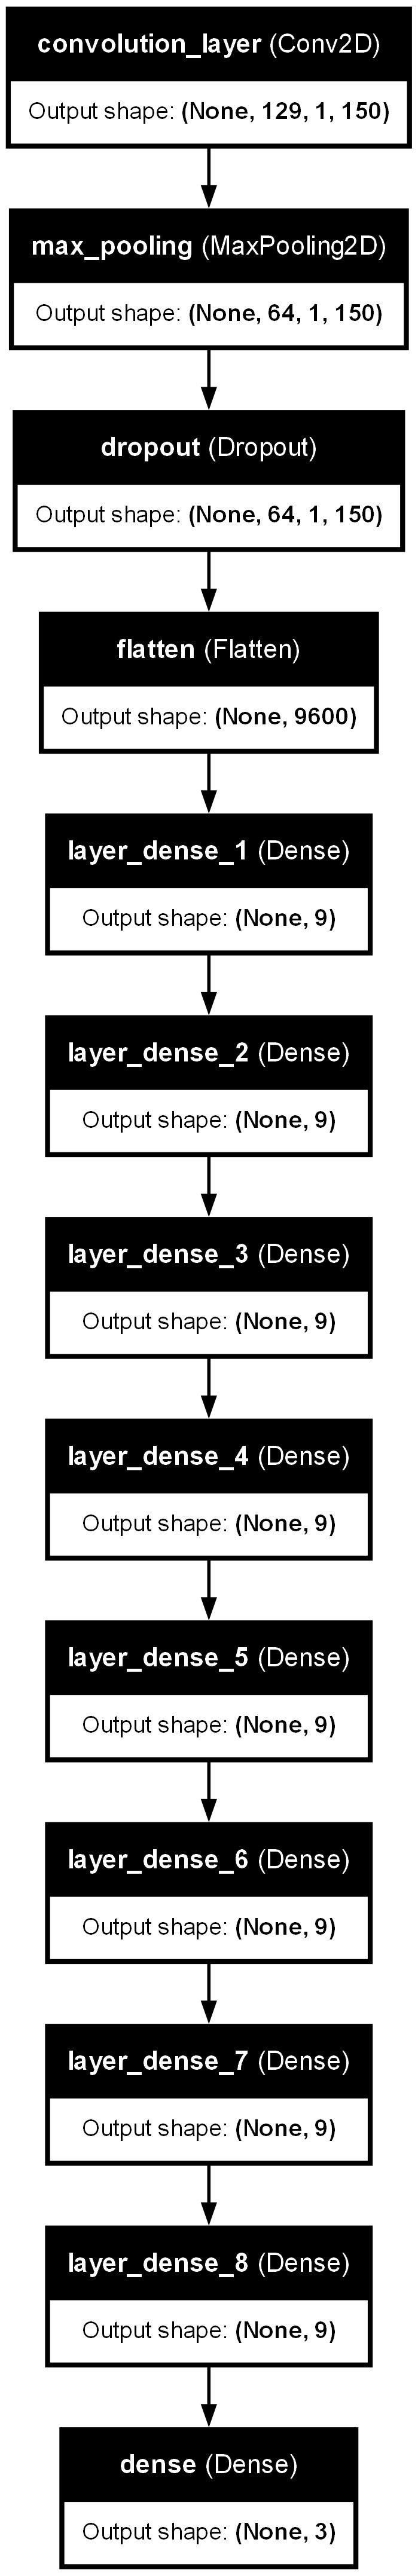

In [25]:
plot_model(model, to_file='../Picture_Model/model_CNN_sentiment_plot.png', show_shapes=True, show_layer_names=True)

> Dump file model_cnn_sentiment.h5

In [26]:
model.save('../model/model_cnn_sentiment.h5')

### 3.5 Evaluation test dataset

> Load file models_sentiment.h5

In [27]:
model_sentiment=load_model("../model/model_cnn_sentiment.h5")

> predict  test dataset 

In [28]:
result = model_sentiment.predict(test_data)

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


> First 10 lines of comments

In [29]:
predict_labels = np.argmax(result,axis=1)
print(predict_labels[0:10])
# Decode the predicted labels
predicted_labels_decoded = label_encoder.inverse_transform(predict_labels)
print(predicted_labels_decoded[0:10])


[2 2 2 0 1 0 2 2 2 2]
['Positive' 'Positive' 'Positive' 'Negative' 'Neutral' 'Negative'
 'Positive' 'Positive' 'Positive' 'Positive']


> Data Preprocessing sample

In [30]:
def Preprocessing(comment):
    comment = remove_punctuation(comment.lower())
    comment = remove_stopword(comment)
    comment = [ViTokenizer.tokenize(comment)]
    comment = wordseparation(comment)
    comment =np.expand_dims(comment_embedding(comment[0]),axis=0)
    return comment

> Predict one a new sample

In [31]:
comment = "Tôi mới mua iphone 15 pro max pin trâu màn hình đẹp dễ sử dụng"
comment_preprocessed=Preprocessing(comment)
result_one = model_sentiment.predict(comment_preprocessed)
result_one = np.argmax(result_one,axis=1)
# Decode the predicted labels
print(label_encoder.inverse_transform(result_one))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
['Positive']


> Evaluate the model through Accuracy measures,Precision,Recall,F1-score,

In [32]:
accuracy = accuracy_score(y_test_encoded, predict_labels)
print(f'Accuracy: {accuracy:.4f}')

precision = precision_score(y_test_encoded, predict_labels, average='weighted')
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test_encoded, predict_labels, average='weighted')
print(f"Recall: {recall:.4f}")

f1score = f1_score(y_test_encoded, predict_labels, average='weighted')
print(f"F1-score: {f1score}")

Accuracy: 0.8094
Precision: 0.7978
Recall: 0.8094
F1-score: 0.802825976080549
